Обробка та аналіз БМД Лабораторна 8  Гаврилюк Р.В  БС-82

Дисперсійний аналіз

Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

Розглянемо дані "Компаній з продажу авто".

In [29]:

column1 = [69, 27, 33, 71, 34, 81, 70] 
column2 = [42, 36, 52, 52, 44, 46, 25]
column3 = [85, 55, 73, 31, 55, 96, 68]

dataset = pd.DataFrame({"gr1": column1,"gr2": column2,"gr3": column3},index = np.arange(1, len(column1)+1))
dataset.index.name = "Day"

dataset

,gr1,gr2,gr3
Day,,,
1,69,42,85
2,27,36,55
3,33,52,73
4,71,52,31
5,34,44,55
6,81,46,96
7,70,25,68


Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [54]:
sum1=round((sum(column1)/len(column1)),2)
sum2=round((sum(column2)/len(column2)),2)
sum3=round((sum(column3)/len(column3)),2)
sd1=round((dataset["gr1"].std()),2)
sd2=round((dataset["gr2"].std()),2)
sd3=round((dataset["gr3"].std()),2)
new_dataset = pd.DataFrame({"gr1": column1,"gr2": column2,"gr3": column3}, index = np.arange(1, len(column1)+1))
new_dataset.index.name = "Day"
new_dataset.loc["mean deviation:"] = [sum1, sum2, sum3]
new_dataset.loc["standard deviation:"] = [sd1,sd2,sd3]
new_dataset

,gr1,gr2,gr3
Day,,,
1,69.00,42.00,85.00
2,27.00,36.00,55.00
3,33.00,52.00,73.00
4,71.00,52.00,31.00
5,34.00,44.00,55.00
6,81.00,46.00,96.00
7,70.00,25.00,68.00
mean deviation:,55.00,42.43,66.14
standard deviation:,22.59,9.52,21.53


[]

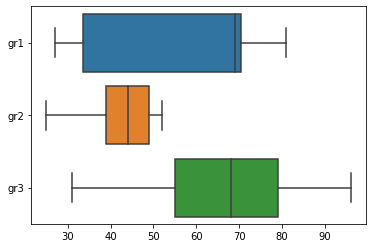

In [55]:
sns.boxplot(data=dataset, orient='h').set()

Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

In [68]:
def dispersia(li):
    k = (len(li.iloc[0,:]))
    Tk = 0
    Tk2 = 0
    for i in range (k):
        Tk = sum(li.iloc[:,i])
        Tk2+=(Tk)**2    
    n = 0
    N = 0    
    for i in range(k):
        n = len(li.iloc[:,i])
        N += n
    summ2 = 0
    T = 0    
    for i in range (k):
        T = sum(li.iloc[:,i])
        summ2 += T        
    summ2 = (summ2)**2
    summ1 = 0    
    for i in range (k):
        for j in range(len(li.iloc[:,i-1])):
            summ1 += (li.iloc[j][i])**2                      
    Konstantne = summ2 / N
    SSInFact = (Tk2 / n) -  Konstantne
    SSGeneral = summ1 - ((summ2) / N)
    SSRand = SSGeneral - SSInFact 
    dInfact = k - 1
    dGeneral = N - 1
    dRand = dGeneral  - dInfact 
    MSInFact = SSInFact / dInfact 
    MSRand =  SSRand / dRand
    Femp = MSInFact /  MSRand    
    if((26 < (dRand) and (dRand) <= 28)):
        dRand = 26        
    elif((28 < (dRand) and (dRand) <= 30)):
        dRand = 27        
    elif((dRand) > 30 and (dRand) <= 40):
        dRand = 28        
    elif((dRand) > 40 and (dRand) <= 60):
        dRand = 29        
    elif((dRand) > 60 and (dRand) <= 120):
        dRand = 30        
    elif((dRand) > 120):
        dRand = 31        
    else:
        dRand = dRand
    if(10 < n and n <= 15):
        dInfact = 11        
    elif(15 < n and n <= 20):
        dInfact = 12        
    elif(20 < n and n <= 30):
        dInfact = 13        
    elif(n > 30):
        dInfact = 14
    else:
        dInfact = k - 1
    Fcritical = pd.read_excel("_Таблиця критичних значень для критерію Фішера.xlsx_").iloc[dRand,dInfact]  
    
    if(Femp <= Fcritical):
        print("Pівність середніх підтверджена")
               
    else:
        print("Pівність середніх не підтверджена") 
    indexs = ["SS(in_fact)", "SS(general)", "SS(random)", "d(in_fact)", "d(general)", "d(random)", "MS()in_fact)", "MS(random", "F(еmperical)", "F(critical))"]
    n__dataset = pd.DataFrame({"calculated value" : [ str(round(SSInFact,2)) , str(round(SSGeneral,2)) ,str(round( SSRand,2)),str(dInfact ),str(dGeneral ), str(dRand), str(round(MSInFact,2)),str(round( MSRand,2)),str(round(Femp,2)), str(Fcritical)]},index = indexs)
    n__dataset.columns.name = "characteristic"
    
    return n__dataset

Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [69]:
dispersia(dataset)

Pівність середніх підтверджена


characteristic,calculated value
SS(in_fact),1970.67
SS(general),8357.24
SS(random),6386.57
d(in_fact),2
d(general),20
d(random),18
MS()in_fact),985.33
MS(random,354.81
F(еmperical),2.78
F(critical)),3.5


Висновок: Для даних трьох груп, згенерованих нормальним розподілом, дисперсійний аналіз підтвердив рівність середніх у группах, нульова гіпотеза підтверджена